In [1]:
import torch
import PIL
import numpy as np
from PIL import Image

In [2]:
def nearest_neighbour_mean(x):

    def cluster(x):
        out = []
        # Iterate each row
        for i in range(len(x)):
            if i-1 < 0:
                out.append(torch.mean(x[i:i+2], dim=0))

            elif i+1 < len(x):
                frame = torch.stack([x[i-1], x[i+1]]).to("cuda")
                diffs = torch.stack([ abs(x[i]-x[i-1]), abs(x[i]-x[i+1])])
                index = torch.min(diffs, dim=0).indices[:,0]
                minvl = torch.stack([frame[j,i,:] for i,j in enumerate(index)])
                out.append(torch.mean(torch.stack([minvl, x[i]]), dim=0))

            else:
                out.append(torch.mean(x[i-1:i+1], dim=0))
        # Stack 
        out = torch.stack(out, dim=0)
        return out.type(torch.int16)
    
    # Run clustering on data
    meaned_v = cluster(x)
    meaned_h = cluster(torch.transpose(x, 0, 1))
    
    # Differrence between original and meaned
    diff_v = x - meaned_v
    diff_h = x - meaned_h
    
    # Get clossest (nearest neighbour)
    nnm = torch.where(abs(diff_h[:,:,0]) < abs(diff_v[:,:,0]), meaned_v, meaned_h)
    
    return nnm

In [16]:
ricardo = [[240, 128, 128], [70, 130, 180], [135, 206, 235]]
gerzon =  [[61, 255, 255], [0, 130, 255], [220, 220, 220]]
miguel =  [[159, 100, 227], [105, 224, 240], [93, 240, 118]]

rgm = torch.tensor([ricardo, gerzon, miguel]).to("cuda").type(torch.float16)

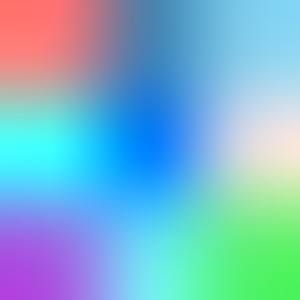

In [17]:
Image.fromarray(rgm.to("cpu").numpy().astype(np.uint8)).resize((300,300))

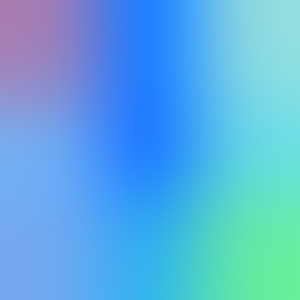

In [18]:
nnm = nearest_neighbour_mean(rgm)
Image.fromarray(nnm.to("cpu").numpy().astype(np.uint8)).resize((300,300))

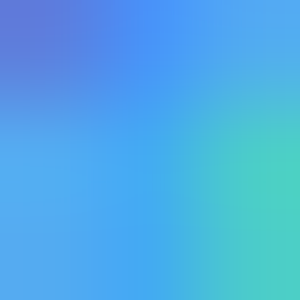

In [19]:
nnm_2 = nearest_neighbour_mean(nnm.type(torch.float32))
Image.fromarray(nnm_2.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

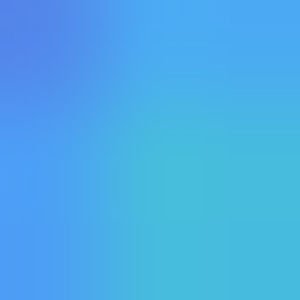

In [20]:
nnm_3 = nearest_neighbour_mean(nnm_2.type(torch.float16))
Image.fromarray(nnm_3.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

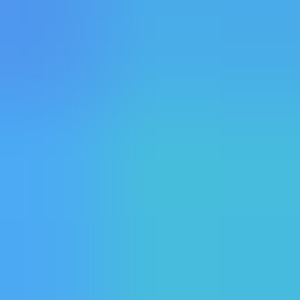

In [21]:
nnm_4 = nearest_neighbour_mean(nnm_3.type(torch.float16))
Image.fromarray(nnm_4.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

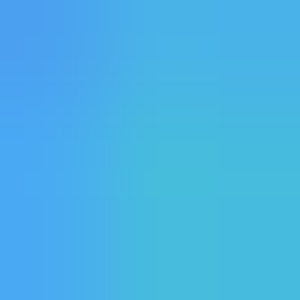

In [22]:
nnm_5 = nearest_neighbour_mean(nnm_4.type(torch.float16))
Image.fromarray(nnm_5.to("cpu").numpy().astype(np.uint8)).resize((300, 300))

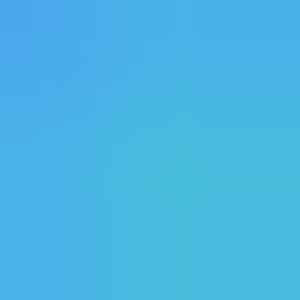

In [23]:
nnm_6 = nearest_neighbour_mean(nnm_5.type(torch.float16))
Image.fromarray(nnm_6.to("cpu").numpy().astype(np.uint8)).resize((300, 300))